## Lightning studio

* What is lightning studio?
* [Why Use lightning Studio?](https://lightning.ai/docs/overview/studios/)
* Installing packages
* Simple example

## Local setup for mac

* Package install
* Simple example

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
!pip install numpyro

In [3]:
import numpyro

In [7]:
def generate_logic_gate_data(num_samples=100):
    inputs = np.random.uniform(-1, 1, size=(num_samples, 2))

    outputs_or = np.logical_or(inputs[:, 0] > 0, inputs[:, 1] > 0).astype(int).reshape(-1, 1)   
    outputs_xor = np.logical_xor(inputs[:, 0] > 0, inputs[:, 1] > 0).astype(int).reshape(-1, 1) 

    inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
    outputs_or_tensor = torch.tensor(outputs_or, dtype=torch.float32)
    outputs_xor_tensor = torch.tensor(outputs_xor, dtype=torch.float32)

    return {
        "inputs": inputs_tensor,
        "outputs_or": outputs_or_tensor,
        "outputs_xor": outputs_xor_tensor
    }

In [8]:
def visualize_logic_gate_data(data):
    inputs = data["inputs"].numpy()
    outputs_or = data["outputs_or"].numpy()
    outputs_xor = data["outputs_xor"].numpy()

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].scatter(inputs[:, 0], inputs[:, 1], c=outputs_or.flatten(), cmap='coolwarm', label='OR')
    axs[0].set_title('OR Gate')
    axs[0].set_xlabel('Input 1')
    axs[0].set_ylabel('Input 2')

    axs[1].scatter(inputs[:, 0], inputs[:, 1], c=outputs_xor.flatten(), cmap='coolwarm', label='XOR')
    axs[1].set_title('XOR Gate')
    axs[1].set_xlabel('Input 1')
    axs[1].set_ylabel('Input 2')

    plt.tight_layout()
    plt.show()

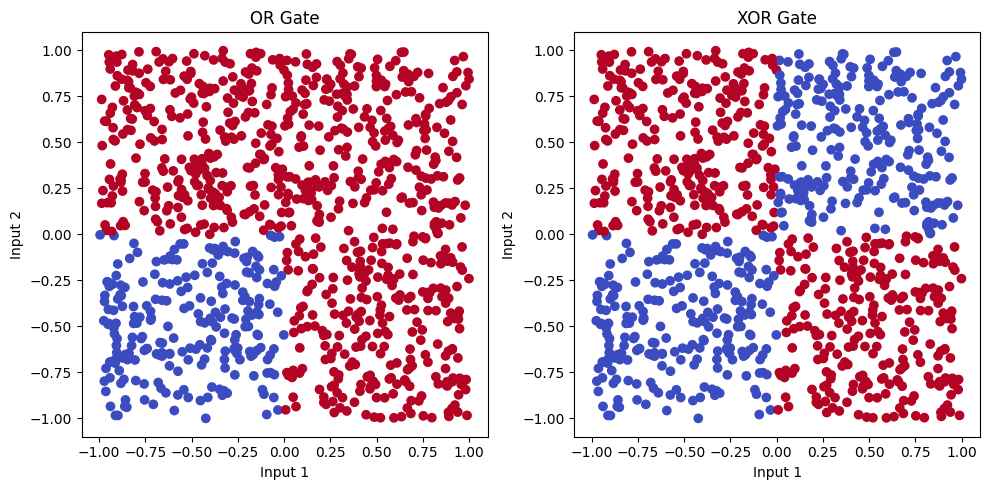

In [9]:
data = generate_logic_gate_data(num_samples=1000)
visualize_logic_gate_data(data)